#<font color='blue'>1. Problema empresarial</font>
Los modelos de clasificación de aprendizaje máquina tienen muchas aplicaciones diferentes, incluidos los recursos humanos. En este ejercicio, se utiliza un conjunto de datos de recursos humanos que consta de 10 características de entrada y 1 de salida para determinar si un empleado renunciará o no.
Las características de entrada son las siguientes: Porcentaje de presentación tardía, Porcentaje de iniciativa del proyecto, Porcentaje de entrega del proyecto a tiempo, Porcentaje de correos electrónicos intercambiados, Porcentaje de capacidad de respuesta, Porcentaje de respuesta de correo electrónico profesional, Porcentaje de intercambio de ideas, Porcentaje de colegas que ayudan, Porcentaje de publicaciones empresariales en LinkedIn, porcentaje de comentarios de Facebook.
La función de salida se llama "Quitting" y es una clase binaria donde 0 representa a un empleado que se queda y 1 representa a un empleado que renuncia. Tenga en cuenta que este conjunto de datos no requiere ninguna normalización ya que todas las características de entrada son porcentajes y ya están en la misma escala.

#<font color='blue'> PASO 1: Análisis exploratorio de datos</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/DOCENCIA/2022/ML/APLICACIONES/HR_DataSet.xlsx')

In [4]:
df.head()

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1


In [ ]:
#df = pd.read_csv('lab1_heart.csv')

In [10]:
print(df.isnull().sum())

Late show up percentage                            0
Project initiative percentage                      0
Percentage of project delivery on time             0
Percentage of emails exchanged                     0
Percentage of responsiveness                       0
Percentage of professional email response          0
Percentage of sharing ideas                        0
Percentage of helping colleagues                   0
Percentage of entrepreneurial posts on LinkedIn    0
Percentage of Facebook comments                    0
Quitting                                           0
dtype: int64


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Late show up percentage,1000.0,0.501025,0.187179,0.0,0.367040,0.495075,0.639074,1.0
Project initiative percentage,1000.0,0.483284,0.184640,0.0,0.359586,0.486289,0.622330,1.0
Percentage of project delivery on time,1000.0,0.427376,0.187881,0.0,0.286459,0.413932,0.552530,1.0
Percentage of emails exchanged,1000.0,0.400711,0.144444,0.0,0.295613,0.397399,0.496453,1.0
Percentage of responsiveness,1000.0,0.537204,0.182367,0.0,0.416221,0.539818,0.661523,1.0
Percentage of professional email response,1000.0,0.484969,0.182355,0.0,0.355052,0.483522,0.612790,1.0
Percentage of sharing ideas,1000.0,0.471185,0.179900,0.0,0.344950,0.458429,0.592071,1.0
Percentage of helping colleagues,1000.0,0.519861,0.194477,0.0,0.381461,0.515514,0.661990,1.0
Percentage of entrepreneurial posts on LinkedIn,1000.0,0.521589,0.193181,0.0,0.374331,0.526394,0.669513,1.0
Percentage of Facebook comments,1000.0,0.576462,0.162826,0.0,0.464761,0.586543,0.689762,1.0


In [6]:
columnas = df.columns
columnas

Index(['Late show up percentage', 'Project initiative percentage',
       'Percentage of project delivery on time',
       'Percentage of emails exchanged', 'Percentage of responsiveness',
       'Percentage of professional email response',
       'Percentage of sharing ideas', 'Percentage of helping colleagues',
       'Percentage of entrepreneurial posts on LinkedIn',
       'Percentage of Facebook comments', 'Quitting'],
      dtype='object')

/tmp/ipython-input-1134857589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
/tmp/ipython-input-1134857589.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
/tmp

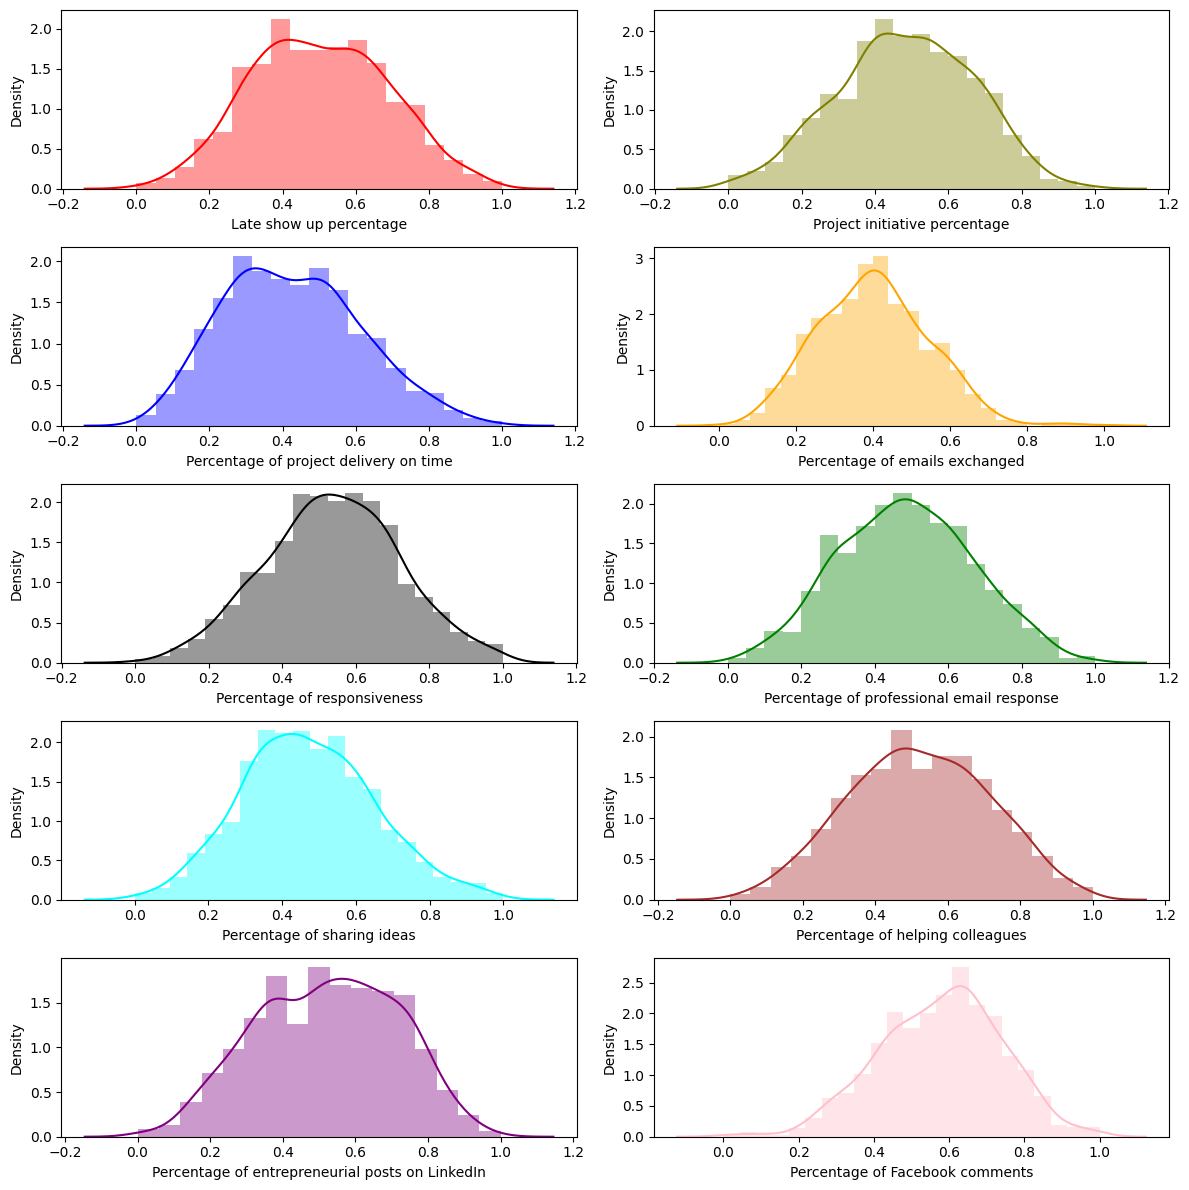

In [11]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.distplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.distplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.distplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.distplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.distplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.distplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.distplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.distplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.distplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.distplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

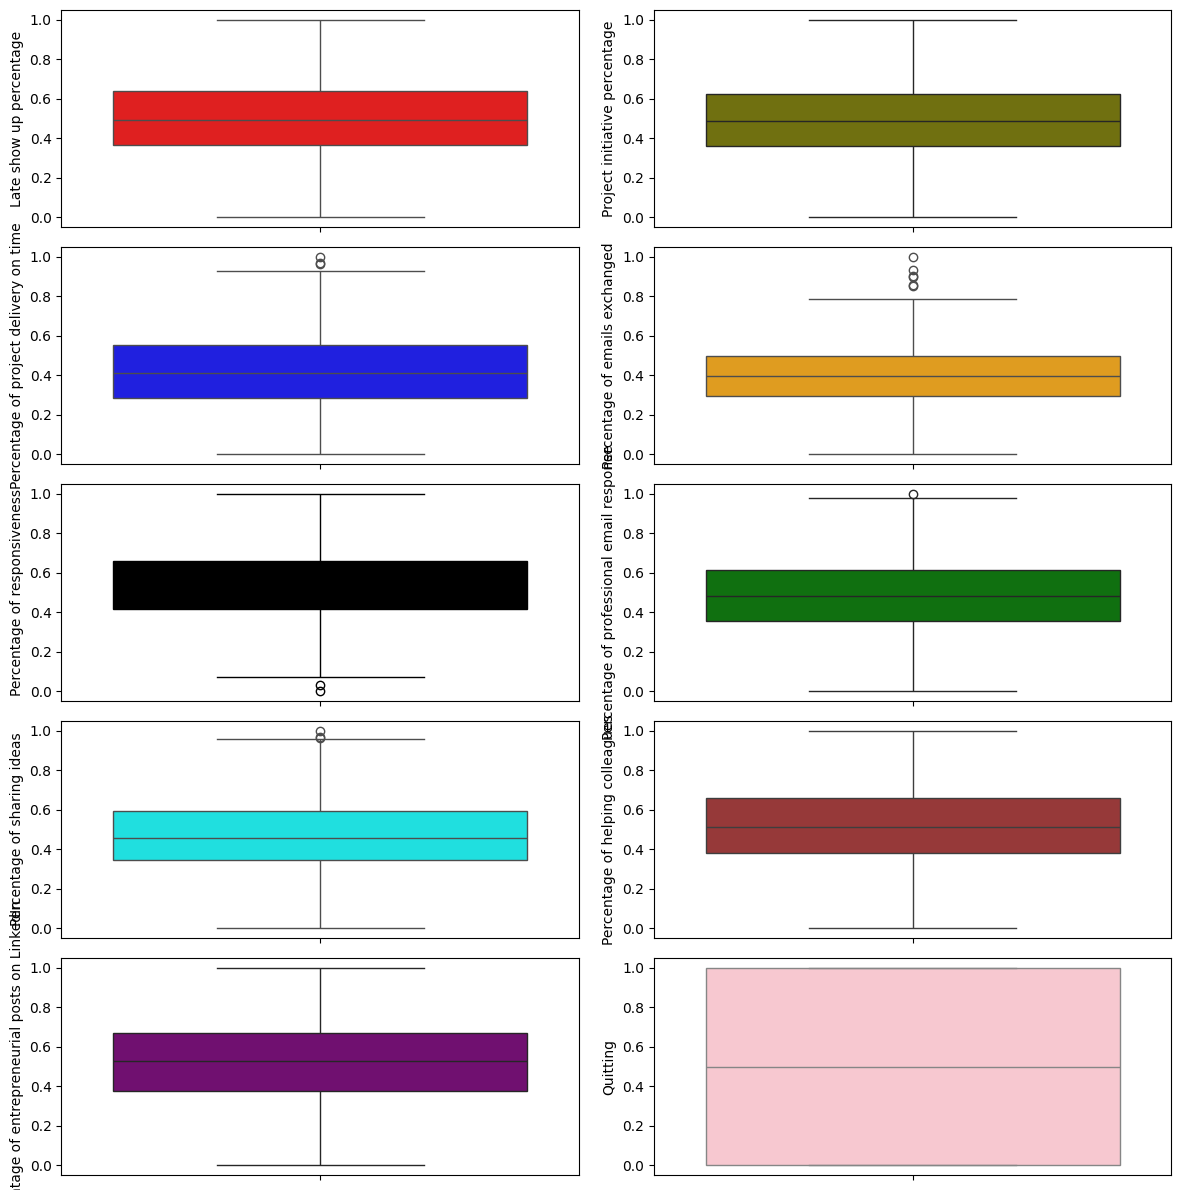

In [8]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.boxplot(df[columnas[0]] , color="red", ax=axes[0, 0])
sns.boxplot(df[columnas[1]] , color="olive", ax=axes[0, 1])
sns.boxplot(df[columnas[2]] , color="blue", ax=axes[1, 0])
sns.boxplot(df[columnas[3]] , color="orange", ax=axes[1, 1])
sns.boxplot(df[columnas[4]] , color="black", ax=axes[2, 0])
sns.boxplot(df[columnas[5]] , color="green", ax=axes[2, 1])
sns.boxplot(df[columnas[6]] , color="cyan", ax=axes[3, 0])
sns.boxplot(df[columnas[7]] , color="brown", ax=axes[3, 1])
sns.boxplot(df[columnas[8]] , color="purple", ax=axes[4, 0])
sns.boxplot(df[columnas[10]] , color="pink", ax=axes[4, 1])
plt.tight_layout()

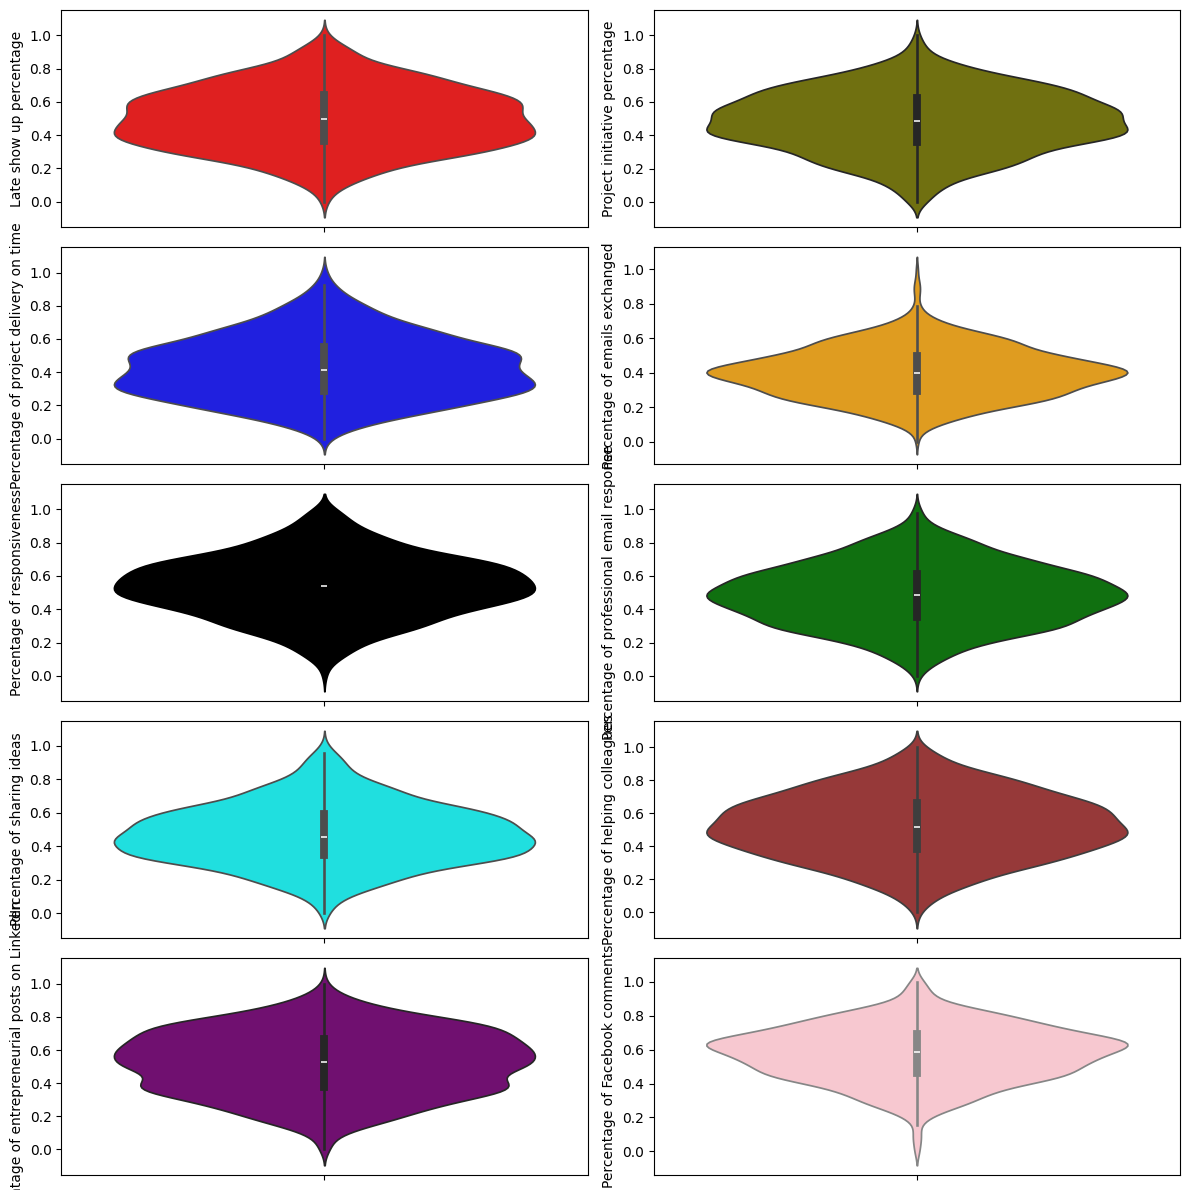

In [9]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.violinplot(df[columnas[0]] , color="red", ax=axes[0, 0])
sns.violinplot(df[columnas[1]] , color="olive", ax=axes[0, 1])
sns.violinplot(df[columnas[2]] , color="blue", ax=axes[1, 0])
sns.violinplot(df[columnas[3]] , color="orange", ax=axes[1, 1])
sns.violinplot(df[columnas[4]] , color="black", ax=axes[2, 0])
sns.violinplot(df[columnas[5]] , color="green", ax=axes[2, 1])
sns.violinplot(df[columnas[6]] , color="cyan", ax=axes[3, 0])
sns.violinplot(df[columnas[7]] , color="brown", ax=axes[3, 1])
sns.violinplot(df[columnas[8]] , color="purple", ax=axes[4, 0])
sns.violinplot(df[columnas[9]] , color="pink", ax=axes[4, 1])
plt.tight_layout()

<Axes: >

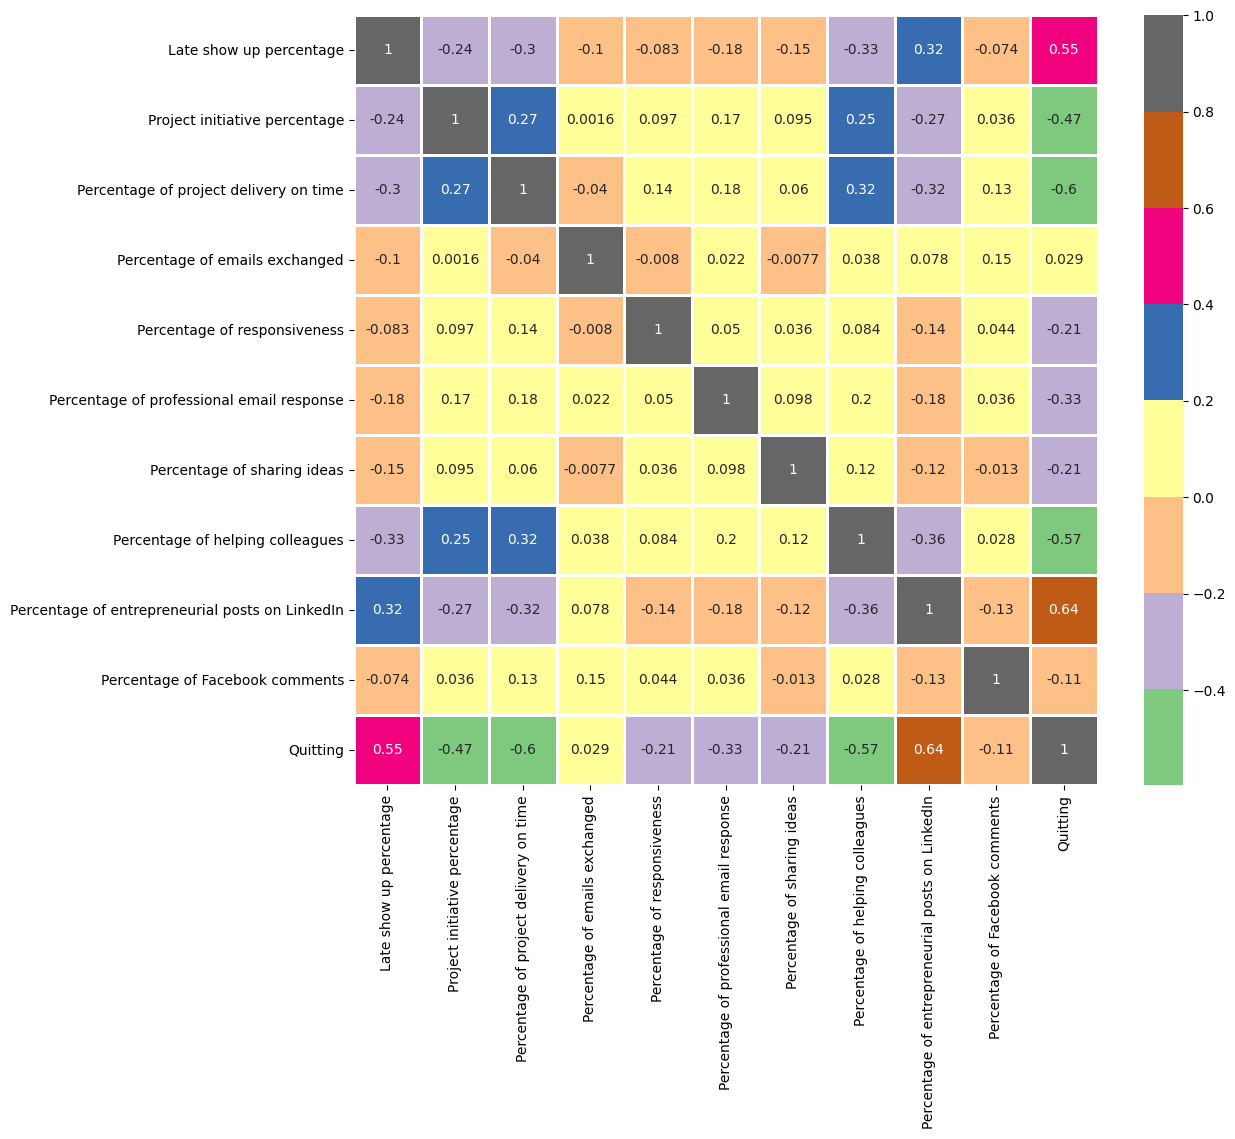

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2, cmap= 'Accent')

In [13]:
x_features=df.drop('Quitting',axis=1)
x_features

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463
...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207


In [14]:
y=df['Quitting']
y

,Quitting
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


#<font color='blue'> PASO 2: Modelo Machine Learning </font>

In [16]:
from sklearn.model_selection import train_test_split

# Train_Test_Split

In [17]:
seed= 50
np.random.seed(seed)
X_tr, X_tst, y_tr, y_tst = train_test_split(x_features,y, test_size=0.30)

In [18]:
len(X_tr)

700

###Normalizamos los datos

In [19]:
media = np.mean(X_tr)
desviacion = np.std(X_tr)
X_tr = (X_tr - media)/desviacion
X_tst = (X_tst - media)/desviacion

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# Aplicamos Logistic regression model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, confusion_matrix, classification_report

In [50]:
np.random.seed(seed)
lr = LogisticRegression()
lr = lr.fit(X_tr, y_tr)
y_hat_tst = lr.predict(X_tst)
y_hat_tr = lr.predict(X_tr)

Acc = accuracy_score(y_tst, y_hat_tst)
F1 = f1_score(y_tst, y_hat_tst)
print('Accuracy Test: %.3f' % Acc)
print('F1 score Test: %.3f' % F1)


Accuracy Test: 0.953
F1 score Test: 0.954


<Axes: >

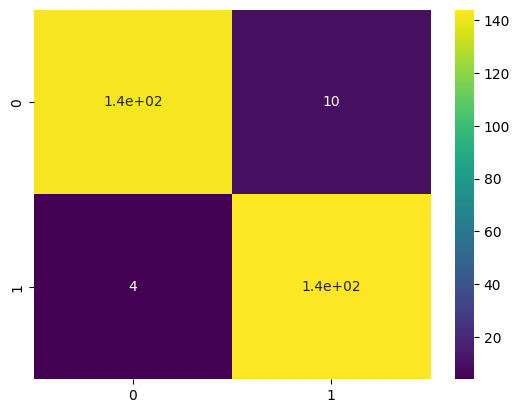

In [51]:
confusion_matrix(y_tst, y_hat_tst)
sns.heatmap(confusion_matrix(y_tst,y_hat_tst), annot=True, cmap='viridis')

In [52]:
roc_curve(y_tst, y_hat_tst)


(array([0.        , 0.06578947, 1.        ]),
 array([0.        , 0.97297297, 1.        ]),
 array([inf,  1.,  0.]))

In [53]:
print(classification_report(y_tst,y_hat_tst))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.94      0.97      0.95       148

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [42]:

lr = LogisticRegression(penalty='l2', C=0.001,solver='lbfgs')

In [43]:
lr.fit(X_tr,y_tr)

LogisticRegression(C=0.001)

In [44]:
y_hat_tst = lr.predict(X_tst)

In [45]:
Acc = accuracy_score(y_tst, y_hat_tst)
F1 = f1_score(y_tst, y_hat_tst)
print('Accuracy Test: %.3f' % Acc)
print('F1 score Test: %.3f' % F1)

Accuracy Test: 0.960
F1 score Test: 0.960


# Prediction y evaluación

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

[[143   9]
 [  3 145]]


<Axes: >

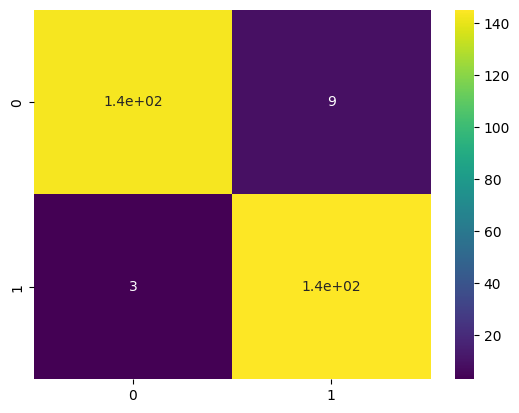

In [47]:
print(confusion_matrix(y_tst,y_hat_tst))
sns.heatmap(confusion_matrix(y_tst,y_hat_tst), annot=True, cmap='viridis')

In [48]:
print(classification_report(y_tst,y_hat_tst))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       152
           1       0.94      0.98      0.96       148

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [54]:
from sklearn.model_selection import GridSearchCV

#Cs = [0.001, 0.1, 1, 10, 100, 1000]
Cs = [0.009, 0.1, 0.11, 0.15, 0.19]

clf= LogisticRegression()

clf_CV= GridSearchCV(clf, param_grid= {'C': Cs}, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

clf_CV.fit(X_tr, y_tr)

print("Best parameter: ", clf_CV.best_params_)

clf2 = LogisticRegression(penalty='l2',solver='lbfgs',C=clf_CV.best_params_['C'])

clf2.fit(X_tr,y_tr)

y_pred = clf2.predict(X_tst)

print(classification_report(y_tst,y_pred))


Best parameter:  {'C': 0.1}
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.94      0.97      0.95       148

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[142  10]
 [  4 144]]


<Axes: >

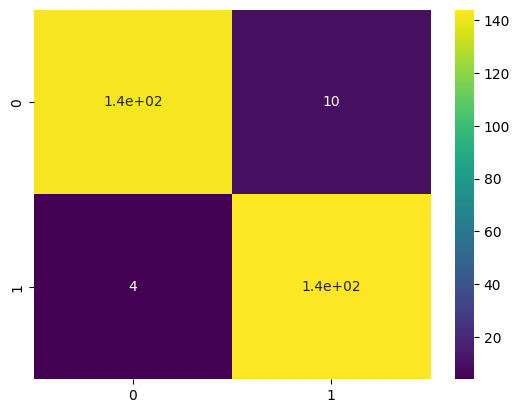

In [55]:
print(confusion_matrix(y_tst,y_hat_tst))
sns.heatmap(confusion_matrix(y_tst,y_hat_tst), annot=True, cmap='viridis')

/tmp/ipython-input-1177782288.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


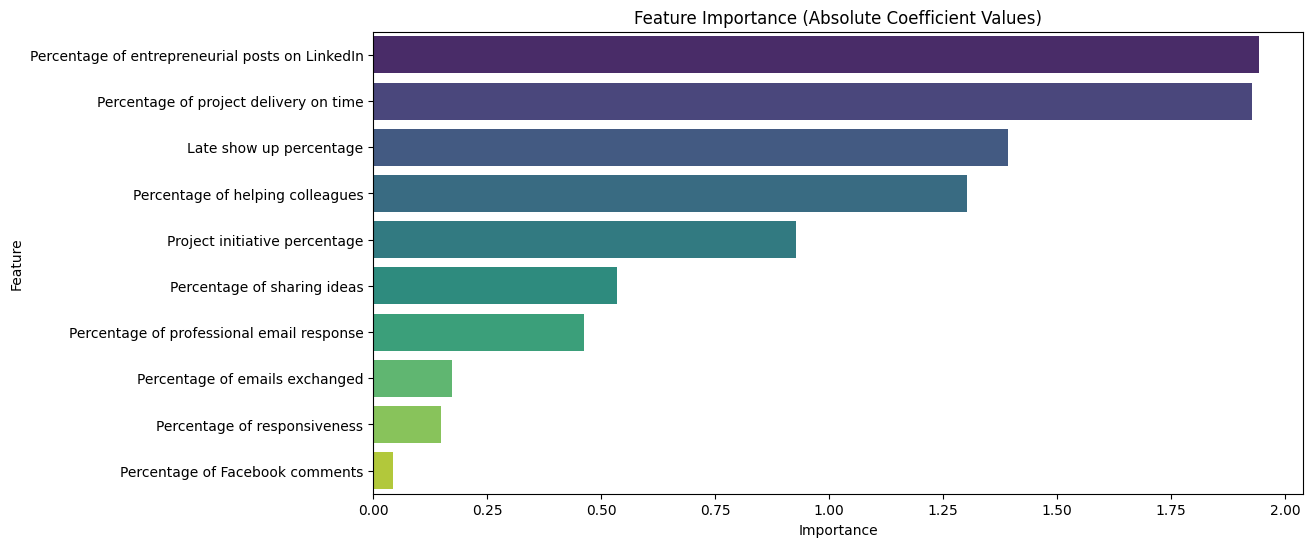

In [56]:
# Calculate the absolute values of the coefficients
feature_importance = abs(lr.coef_[0])

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'feature': x_features.columns, 'importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [57]:
import joblib

# Save the trained model
filename = 'logistic_regression_model.pkl'
joblib.dump(lr, filename)

print(f"Model saved as {filename}")

Model saved as logistic_regression_model.pkl


# Task
Deploy the trained model to make predictions on new data.

## Load the model

### Subtask:
Load the saved model from the `.pkl` file.


**Reasoning**:
Load the saved logistic regression model from the pickle file using joblib.



In [58]:
loaded_model = joblib.load('logistic_regression_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.


## Prepare new data

### Subtask:
Load and preprocess the new data that the model will predict on. This should follow the same preprocessing steps as the training data, including normalization using the mean and standard deviation from the training data.


**Reasoning**:
Load the new data and preprocess it by separating features and normalizing them using the mean and standard deviation from the training data.



In [59]:
# Assume the new data is in a file named 'HR_New_Data.xlsx' in the same directory
new_df = pd.read_excel('/content/drive/MyDrive/DOCENCIA/2022/ML/APLICACIONES/HR_DataSet.xlsx') # Using the same dataset for demonstration
# Separate features
new_x_features = new_df.drop('Quitting', axis=1)
# Normalize the new data features using the mean and standard deviation from the training data
new_x_features_normalized = (new_x_features - media) / desviacion

## Make predictions

### Subtask:
Use the loaded model to make predictions on the prepared new data.


**Reasoning**:
Use the loaded logistic regression model to predict on the normalized new features.



In [60]:
new_predictions = loaded_model.predict(new_x_features_normalized)

## Interpret predictions

### Subtask:
Understand and interpret the output of the model.


**Reasoning**:
Examine the new_predictions variable and add the predictions to the new_df DataFrame for interpretation.



In [61]:
print(new_predictions[:10])
new_df['Predicted_Quitting'] = new_predictions
print(new_df.head())

[1 0 0 1 1 0 0 0 0 1]
   Late show up percentage  Project initiative percentage  \
0                 0.477912                       0.517593   
1                 0.298068                       0.403864   
2                 0.353470                       0.545904   
3                 0.684900                       0.678940   
4                 0.714167                       0.365101   

   Percentage of project delivery on time  Percentage of emails exchanged  \
0                                0.255846                        0.446856   
1                                0.234836                        0.490999   
2                                0.483996                        0.509837   
3                                0.310686                        0.490986   
4                                0.294082                        0.392456   

   Percentage of responsiveness  Percentage of professional email response  \
0                      0.348797                                   0.06

## Summary:

### Data Analysis Key Findings

*   The logistic regression model was successfully loaded from the `logistic_regression_model.pkl` file.
*   New data from the `HR_DataSet.xlsx` file was loaded and preprocessed, including normalization using the mean and standard deviation from the training data.
*   The loaded model successfully generated predictions on the normalized new data.
*   The predictions, which are integers (0s and 1s), were added as a new column (`Predicted_Quitting`) to the new data DataFrame for easier interpretation, where 0 indicates the model predicts the employee will stay, and 1 indicates the model predicts the employee will quit.

### Insights or Next Steps

*   Further analysis could involve comparing the predicted quitting status with the actual quitting status in the new dataset (if available) to evaluate the model's performance on unseen data.
*   The interpreted predictions can now be used for business decisions, such as identifying employees at high risk of quitting and implementing retention strategies.
